In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
train = pd.read_csv('../data/processed/train.csv')
list(train)

['zoneID',
 'zoneArea',
 'SidewalkCount',
 'percentSidewalkArea',
 'Paved ParkingCount',
 'percentPaved ParkingArea',
 'Paved DrivewayCount',
 'percentPaved DrivewayArea',
 'PavementCount',
 'percentPavementArea',
 'PatioCount',
 'percentPatioArea',
 'In Ground PoolCount',
 'percentIn Ground PoolArea',
 'TankCount',
 'percentTankArea',
 'Unpaved DrivewayCount',
 'percentUnpaved DrivewayArea',
 'Uncovered DeckCount',
 'percentUncovered DeckArea',
 'Compacted SoilCount',
 'percentCompacted SoilArea',
 'BridgeCount',
 'percentBridgeArea',
 'DockCount',
 'percentDockArea',
 'Above Ground PoolCount',
 'percentAbove Ground PoolArea',
 'Recreation Court/Ball FieldCount',
 'percentRecreation Court/Ball FieldArea',
 'Golf CourseCount',
 'percentGolf CourseArea',
 'Unpaved Athletic FieldCount',
 'percentUnpaved Athletic FieldArea',
 'Covered DeckCount',
 'percentCovered DeckArea',
 'Unpaved ParkingCount',
 'percentUnpaved ParkingArea',
 'CourtyardCount',
 'percentCourtyardArea',
 'Open SpaceCoun

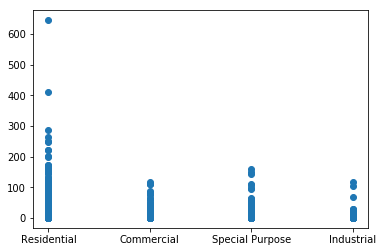

In [119]:
plt.scatter(train['zoneType'], train['StructureCount'])

In [84]:
train['CourtyardCount'].describe()

count    8548.000000
mean        0.106107
std         1.083652
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        41.000000
Name: CourtyardCount, dtype: float64

In [66]:
train.iloc[8395]

zoneID                                      400610530
zoneArea                                      22.2279
SidewalkCount                                       0
percentSidewalkArea                                 0
Paved ParkingCount                                  1
percentPaved ParkingArea                      1253.96
Paved DrivewayCount                                 0
percentPaved DrivewayArea                           0
PavementCount                                       0
percentPavementArea                                 0
PatioCount                                          0
percentPatioArea                                    0
In Ground PoolCount                                 0
percentIn Ground PoolArea                           0
TankCount                                           0
percentTankArea                                     0
Unpaved DrivewayCount                               0
percentUnpaved DrivewayArea                         0
Uncovered DeckCount         

(array([6.872e+03, 6.940e+02, 4.200e+02, 2.680e+02, 1.580e+02, 6.600e+01,
        2.800e+01, 8.000e+00, 1.000e+01, 3.000e+00, 2.000e+00, 4.000e+00,
        5.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.        ,   8.13333333,  16.26666667,  24.4       ,
         32.53333333,  40.66666667,  48.8       ,  56.93333333,
         65.06666667,  73.2       ,  81.33333333,  89.46666667,
         97.6       , 105.73333333, 113.86666667, 122.        ,
        130.13333333, 138.26666667, 146.4       , 154.53333333,
        162.66666667, 170.8       , 178.93333333, 187.06666667,
        195.2       , 203.33333333, 211.46666667, 219.6       ,
        227.73333333, 235.86666667, 244.        ]),
 <a list of 30 Patch objects>)

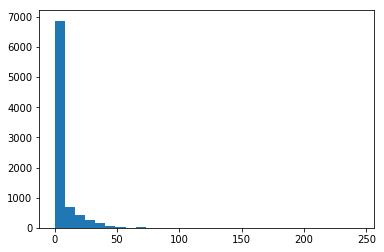

In [42]:
plt.hist(train['Paved DrivewayCount'].values, bins=30)

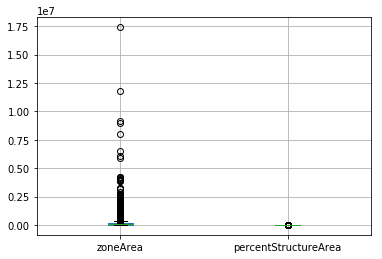

In [7]:
newTrain = train.drop([7850], axis=0)
newTrain.boxplot(column=['zoneArea', 'percentStructureArea'])

In [8]:
print(train['zoneArea'][0])

6935.35696868561


In [37]:
zoneAreaBin = []
zoneAreaCol = []
one_std = train['zoneArea'].mean()+train['zoneArea'].std()
for value in train['zoneArea']:
    if(value <= one_std):
        zoneAreaBin.append("Small Area")
        zoneAreaCol.append("red")
    else:
        zoneAreaBin.append("Large Area")
        zoneAreaCol.append("blue")
train['zoneAreaBin'] = pd.Series(zoneAreaBin)
train['zoneAreaCol'] = pd.Series(zoneAreaCol)Side

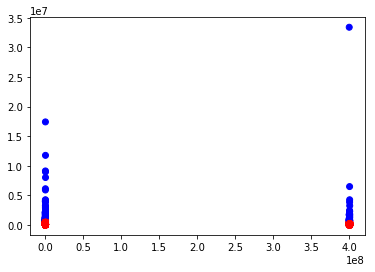

In [38]:
plt.scatter(train['zoneID'], train['zoneArea'], c=zoneAreaCol)

In [21]:
zSeries = pd.Series(zoneAreaBin)
zSeries.describe()

count           8548
unique             2
top       Small Area
freq            8284
dtype: object

In [10]:
train['zoneArea'].idxmax()

7850

In [26]:
train.iloc[7066]

zoneID                                         215404
zoneArea                                  1.17563e+07
SidewalkCount                                     343
percentSidewalkArea                         0.0464558
Paved ParkingCount                                 41
percentPaved ParkingArea                     0.255093
Paved DrivewayCount                                15
percentPaved DrivewayArea                  0.00716312
PavementCount                                     374
percentPavementArea                         0.0264803
PatioCount                                         67
percentPatioArea                           0.00801916
In Ground PoolCount                                12
percentIn Ground PoolArea                  0.00123451
TankCount                                           5
percentTankArea                           0.000641932
Unpaved DrivewayCount                               3
percentUnpaved DrivewayArea               0.000172726
Uncovered DeckCount         

In [15]:
validation = pd.read_csv('../data/processed/validation.csv')

In [166]:
list(train)

['zoneID',
 'zoneArea',
 'SidewalkCount',
 'percentSidewalkArea',
 'Paved ParkingCount',
 'percentPaved ParkingArea',
 'Paved DrivewayCount',
 'percentPaved DrivewayArea',
 'PavementCount',
 'percentPavementArea',
 'PatioCount',
 'percentPatioArea',
 'In Ground PoolCount',
 'percentIn Ground PoolArea',
 'TankCount',
 'percentTankArea',
 'Unpaved DrivewayCount',
 'percentUnpaved DrivewayArea',
 'Uncovered DeckCount',
 'percentUncovered DeckArea',
 'Compacted SoilCount',
 'percentCompacted SoilArea',
 'BridgeCount',
 'percentBridgeArea',
 'DockCount',
 'percentDockArea',
 'Above Ground PoolCount',
 'percentAbove Ground PoolArea',
 'Recreation Court/Ball FieldCount',
 'percentRecreation Court/Ball FieldArea',
 'Golf CourseCount',
 'percentGolf CourseArea',
 'Unpaved Athletic FieldCount',
 'percentUnpaved Athletic FieldArea',
 'Covered DeckCount',
 'percentCovered DeckArea',
 'Unpaved ParkingCount',
 'percentUnpaved ParkingArea',
 'CourtyardCount',
 'percentCourtyardArea',
 'Open SpaceCoun

In [194]:
train['PatioCount'].value_counts()

0      3367
1      1480
2       829
3       481
4       357
5       262
6       200
8       176
7       157
9       144
10      124
12      110
11      100
14       88
13       83
15       67
16       61
18       52
17       51
19       41
20       39
22       37
21       36
26       23
28       21
23       21
25       17
27       15
24       14
30        9
       ... 
39        3
33        3
47        3
37        3
38        3
45        2
56        2
76        2
53        2
43        2
67        2
70        2
104       1
72        1
48        1
80        1
46        1
57        1
74        1
122       1
78        1
51        1
55        1
44        1
140       1
62        1
69        1
77        1
54        1
63        1
Name: PatioCount, Length: 67, dtype: int64

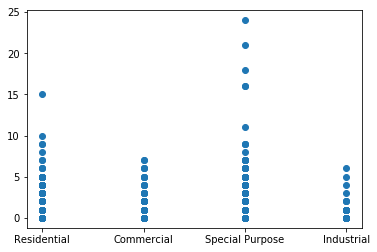

In [206]:
plt.scatter(train['zoneType'], )

In [162]:
gravelSandpit = []
dam = []
sideWalk = []
percentStructureArea = []
structCount = []

for i in train.index:
    gsVal = train.loc[i,'Gravel/SandpitCount']
    if gsVal > 0:
        gravelSandpit.append(1)
    else:
        gravelSandpit.append(0)
        
    damVal = train.loc[i, 'DamCount']
    if damVal > 0:
        dam.append(1)
    else:
        dam.append(0)
        
    structVal = train.loc[i, 'percentStructureArea']
    if structVal > train['percentStructureArea'].mean() + train['percentStructureArea'].quantile(q=0.75):
        percentStructureArea.append("Large")
    else:
        percentStructureArea.append("Small")
        
    scVal = train.loc[i, 'StructureCount']
    if scVal > train['StructureCount'].mean() + train['StructureCount'].quantile(q=0.75):
        structCount.append("Many")
    else:
        structCount.append("Few")

In [163]:
pd.Series(percentStructureArea).value_counts()

Small    8002
Large     546
dtype: int64

In [164]:
for i in train.index:
    urVal = train.loc[i, 'Unpaved RoadCount']
    if urVal > 0
        .append(1)
    else:
        sideWalk.append(0)

In [131]:
train['StructureCount'].mean() + train['StructureCount'].quantile(q=0.75)

27.819255966307907

In [170]:
unpavedRoad = []
for i in train.index:
    swVal = train.loc[i, 'Unpaved RoadCount']
    if scVal > 0:
        unpavedRoad.append(1)
    else:
        unpavedRoad.append(0)

In [180]:
trail = []
for i in train.index:
    tVal = train.loc[i, 'TrailCount']
    if tVal > 0:
        trail.append(1)
    else:
        trail.append(0)

In [184]:
pavedAlley = []
for i in train.index:
    pVal = train.loc[i, 'Paved AlleyCount']
    if pVal > 0:
        pavedAlley.append(1)
    else:
        pavedAlley.append(0)

In [207]:
structureRatio = []
for i in train.index:
    if train.loc[i, 'percentStructureArea'] == 0:
        structureRatio.append(0)
    else:
        sVal = train.loc[i, 'StructureCount']/train.loc[i, 'percentStructureArea']
        structureRatio.append(sVal)

In [213]:
recScore = []
for i in train.index:
    rVal = train.loc[i, 'Open SpaceCount']+train.loc[i, 'Unpaved Athletic FieldCount']+train['Recreation Court/Ball FieldCount']
    recScore.append(rVal)

In [218]:
train['recScore'] = recScore

In [ ]:
train['recScore'].describe()

In [195]:
structRatio = []

for i in train.index:
    sVal = train.loc[i, 'structureRatio']
    if sVal > (train['structureRatio'].mean() + train['structureRatio'].quantile(q=0.75)):
        structRatio.append('large')
    else:
        structRatio.append('small')

In [216]:
sidewalkArea = []

for i in train.index:
    sVal = train.loc[i, 'percentSidewalkArea']
    if sVal > (train['percentSidewalkArea'].mean() + train['percentSidewalkArea'].quantile(q=0.75)):
        sidewalkArea.append('large')
    else:
        sidewalkArea.append('small')

In [220]:
recreationScore = []

for i in train.index:
    rVal = train.loc[i, 'recScore']
    if rVal > train['recScore'].mean() + train['recScore'].quantile(q=0.75):
        recreationScore.append('large')
    else:
        recreationScore.append('small')

TypeError: Could not convert 0        920
1        920
2        920
3        920
4        920
5        920
6        920
7        920
8        920
9        920
10       920
11       920
12       920
13       920
14       920
15       920
16       920
17       920
18       920
19       920
20       920
21       920
22       920
23       920
24       920
25       920
26       920
27       920
28       920
29       920
        ... 
8518     920
8519     920
8520     920
8521     920
8522     920
8523     920
8524     920
8525     920
8526     920
8527     920
8528     920
8529     920
8530     920
8531     920
8532     920
8533     920
8534     920
8535     920
8536     920
8537     920
8538     920
8539     920
8540     920
8541     920
8542     920
8543     920
8544     920
8545     920
8546    9468
8547     920
Name: Recreation Court/Ball FieldCount, Length: 8548, dtype: int64 to numeric

In [161]:
newTrainData = pd.DataFrame()

In [ ]:
newTrainData['structCount'] = structCount
newTrainData['percentStructArea'] = percentStructureArea
newTrainData['sidewalk'] = sideWalk
newTrainData['dam'] = dam
newTrainData['gravelSandpit'] = gravelSandpit
newTrainData['unpavedRoad'] = unpavedRoad
newTrainData['trail'] = trail
newTrainData['pavedAlley'] = pavedAlley
newTrainData['structRatio'] = structRatio
newTrainData['sidewalkArea'] = sidewalkArea